# Preparation

In [1]:
# This file is based on: 1_regression_presence_of_accident
# Remove features which were found correlated with others
# Remove the categorical features which has only two categories
# Remove features identified by VIF

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [7]:
from mtp_function_yl import *

In [204]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn import svm
# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay
import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [11]:
%watermark  -u -d -v -m --iversions

Last updated: 2024-11-22

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-124-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 48
Architecture: 64bit

cv2              : 4.8.1
pandas           : 2.0.3
seaborn          : 0.12.2
mlxtend          : 0.23.1
scipy            : 1.14.0
matplotlib       : 3.7.2
shapely          : 2.0.2
numpy            : 1.26.4
PIL              : 10.0.0
sklearn          : 1.3.0
pyproj           : 3.6.1
category_encoders: 2.6.3
statsmodels      : 0.14.4
torch            : 2.0.1



# Data Loading and Processing

## Data loading

In [12]:
# Check the normalization and standardization of data
# Previously: yeojohnson transformation for normalization; zscore for standardization

In [13]:
# # Raw data (without transformation and standardization)

# # Curb related variables of accident points
# dfac_cr = pd.read_csv('/home/yelhe/script/mt/output/accident_crevall_new.csv')
# # Curb related variables of pseudo points
# dfrp_cr = pd.read_csv('/home/yelhe/script/mt/output/pseudo_crevall_new.csv')

# # Traffic transport variables of accident points
# dfac_tt = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_sum_final.csv')
# # Traffic transport variables of pseudo points
# dfrp_tt = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_rp_final.csv')

# # accident_rm_norm_stan_new : accident points, after normalization and standardization 
# # pseudo_rm_norm_stan_rp : pseudo points, after normalization and standardization
# # ttvariables_rp_all_final : pseudo points, after normalization and standardization, add categorical variables
# # ttvarialbes_all_final : accident points, after normalization and standardization, add categorical variables

In [14]:
# print(dfac_cr.shape, dfrp_cr.shape, dfac_tt.shape, dfrp_tt.shape)

In [15]:
# # Merge variables for dfac
# dfac_cr = dfac_cr.rename(columns = {'id':'Nr'})
# dfac = dfac_cr.merge(dfac_tt, how = 'left', on = ['Nr'])
# # Check NA
# print(dfac.isnull().values.any())
# # Merge variables for dfrp
# dfrp = dfrp_cr.merge(dfrp_tt, how = 'left', on = ['id'])

In [16]:
# # Output
# # Raw variables of accident points
# dfac.to_csv('/home/yelhe/script/mtp/redo_model_input/acc_rawvar.csv', index = False)
# # Raw variables of random pseudo points
# dfrp.to_csv('/home/yelhe/script/mtp/redo_model_input/pse_rawvar.csv', index = False)

In [17]:
# # Drop some variables
# dfacr = dfac.drop(columns = ['z_stznr', 'r_surface'])
# dfrpr = dfrp.drop(columns = ['z_stznr', 'r_surface'])
# # NOTICE: dcurb, curbtype (just from city plan datasets; droad not always equal droad_sl)

In [18]:
# load dataset processed above
dfac = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/acc_rawvar.csv')
dfrp = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/pse_rawvar.csv')

In [19]:
print(dfac.shape, dfrp.shape)

(295, 45) (792, 45)


## Data processing

In [20]:
# NOTICE:
## For accident presence, a combination of accident points and pseudo points is needed;
## For accident severity, only the set of accident points is needed.

In [21]:
# # For accident presence

# # Generate variable: acp, 1 for presence and 0 for absence
# dfrpr = dfrpr.rename(columns = {'id':'Nr'})
# dfacr = dfacr.assign(acp = 1)
# dfrpr = dfrpr.assign(acp = 0)
# # For accident prensence, combine the two datasets
# print(dfacr.shape, dfrpr.shape)
# df_acp_raw = pd.concat([dfacr, dfrpr], ignore_index = True, keys = ['ac','rp'])

In [22]:
## Output: raw variables for presence of accidents
# df_acp_raw.to_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_rawvar.csv', index = False)

In [23]:
# ## For accident severity
# # Load data with severity variables
# df_sev = pd.read_csv('/home/yelhe/script/mt/model/dfacrsv.csv')
# sev = df_sev[['Nr','SV','LV','pd','svp','lvp','pdp','inp']]
# df_sev_raw = dfacr.merge(sev, how = 'left', on = ['Nr'])

In [24]:
# # # Output: raw variables for severity of accidents
# df_sev_raw.to_csv('/home/yelhe/script/mtp/redo_model_input/model_acs_rawvar.csv', index = False)

In [25]:
# Reload above-processed data
acpr = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_rawvar.csv')
acsr = pd.read_csv('/home/yelhe/script/mtp/redo_model_input/model_acs_rawvar.csv')

In [26]:
print(acpr.shape, acsr.shape)

(1087, 44) (295, 50)


## Data transformation
### Distribution checking

In [27]:
# Drop columns
# acpr = acpr.drop(columns = ['d_carcount', 'd_bicyclecount', 'dgvm', 'dcurb', 'curbtype'])
# acsr = acsr.drop(columns = ['d_carcount', 'd_bicyclecount', 'dgvm', 'dcurb', 'curbtype'])
# Numeric variables
c1 = ['cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin', 'iemin',
      'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie',  'dbusl', 'dtraml',
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
      'dstopsign', 'dtrafficarea', 'droad','droad_sl','dvfpath',
      'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',  
      'bicyclecount', 'carcount']
# Categorical variables
c2 = ['z_qnr', 'z_knr','trafficarea','r_width','speedlimit']
# All variables
c3 = ['Nr', 'cmean', 'cmin', 'csum', 'cmax', 'cp', 'mewmin', 'megmin', 'iemin',
      'mewmax', 'megmax', 'iemax', 'mew', 'meg', 'ie',  'dbusl', 'dtraml',
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro',
      'dstopsign', 'dtrafficarea', 'droad','droad_sl','dvfpath',
      'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width', 'speedlimit',  
      'bicyclecount', 'carcount','z_qnr', 'z_knr','trafficarea',
      'r_width','speedlimit']
# 'Nr' + c1
c4 = c1.copy()
c4.insert(0, 'Nr')
# 'Nr' + c2
c5 = c2.copy()
c5.insert(0, 'Nr')

### Normalization

#### For presence of accidents

In [28]:
# normaltest pvalue (if it's bigger than alpha for example 0.05, we could say it's normal)
nmpv = []
for i in range(0, len(c1)):
    nmpv.append((stats.normaltest(acpr[c1[i]])).pvalue)
# print(nmpv)
dfnmpv = pd.DataFrame()
dfnmpv['var'] = c1
dfnmpv['pv'] = nmpv
# dfnmpv[dfnmpv['pv']>0.05]

In [29]:
# Shapiron test (the closer to 1 the closer to normal distribution)
shpv = []
for i in range(0, len(c1)):
    shpv.append((stats.shapiro(acpr[c1[i]])).pvalue)
dfshpv = pd.DataFrame()
dfshpv['var'] = c1
dfshpv['pv'] = shpv
# dfnmpv[dfnmpv['pv']>0.05]

In [30]:
# Perform yeojohnson transformation
acp_yj = pd.DataFrame()

In [31]:
acp_yj[c4[0]] = acpr[c4[0]]
for i in range(1, 35):
    acp_yj[c4[i]], lmbda = stats.yeojohnson(acpr[c4[i]])
    # print(i, lmbda)

In [63]:
# Use scikit-learn powertransformer 
acp_yj1 = pd.DataFrame()
acp_yj1[c4[0]] = acpr[c4[0]]
for i in range(1, 35):
    ar = np.array(acpr[c4[i]]).reshape(-1,1)
    acp_yj1[c4[i]] = PowerTransformer(method = 'yeo-johnson', standardize = True).fit_transform(ar)
    # print(i)

In [161]:
# # normaltest pvalue (if it's bigger than alpha for example 0.05, we could say it's normal)
# nmpv_yj = []
# for i in range(0, len(c1)):
#     nmpv_yj.append((stats.normaltest(acp_yj[c1[i]])).pvalue)
# dfnmpv_yj = pd.DataFrame()
# dfnmpv_yj['var'] = c1
# dfnmpv_yj['pv'] = nmpv_yj
# dfnmpv_yj[dfnmpv_yj['pv']>0.05]

In [162]:
# # Shapiron test (the closer to 1 the closer to normal distribution)
# shpv_yj = []
# for i in range(0, len(c1)):
#     shpv_yj.append((stats.shapiro(acp_yj[c1[i]])).pvalue)
# dfshpv_yj = pd.DataFrame()
# dfshpv_yj['var'] = c1
# dfshpv_yj['pv'] = shpv_yj
# dfshpv_yj[dfshpv_yj['pv']>0.05]

In [65]:
# normaltest pvalue (if it's bigger than alpha for example 0.05, we could say it's normal)
nmpv_yj1 = []
for i in range(0, len(c1)):
    nmpv_yj1.append((stats.normaltest(acp_yj1[c1[i]])).pvalue)
dfnmpv_yj1 = pd.DataFrame()
dfnmpv_yj1['var'] = c1
dfnmpv_yj1['pv'] = nmpv_yj1
dfnmpv_yj1[dfnmpv_yj1['pv']>0.05]

,var,pv
5,mewmin,0.997842
8,mewmax,0.975247
9,megmax,0.591210
11,mew,0.981678
12,meg,0.912928
16,dtrainl,0.165498
21,dpedcro,0.331637
22,dstopsign,0.990789
33,carcount,0.289830


In [66]:
# Shapiron test (the closer to 1 the closer to normal distribution)
shpv_yj1 = []
for i in range(0, len(c1)):
    shpv_yj1.append((stats.shapiro(acp_yj1[c1[i]])).pvalue)
dfshpv_yj1 = pd.DataFrame()
dfshpv_yj1['var'] = c1
dfshpv_yj1['pv'] = shpv_yj1
dfshpv_yj1[dfshpv_yj1['pv']>0.05]

,var,pv
5,mewmin,0.789830
8,mewmax,0.977424
11,mew,0.911173
12,meg,0.078036
20,dparktw,0.094959
22,dstopsign,0.702163


In [158]:
# i = i+1
# fig, axes = plt.subplots(2)
# sm.qqplot(acp_yj[c1[i]], stats.distributions.norm, fit = True,  line = 's', ax = axes[0])
# axes[0].set_title(c1[i])
# sm.qqplot(acp_yj1[c1[i]], stats.distributions.norm, fit = True,  line = 's', ax = axes[1])
# axes[1].set_title(c1[i])

In [160]:
# i = i+1
# fig, axes = plt.subplots(2)
# axes[0].hist(acp_yj[c4[i]])
# axes[1].hist(acp_yj1[c4[i]])

In [ ]:
# After checking, using yeojohnson from scikit-learn is better, 
# since it's zero-mean, unit-variance normalization.

#### For severity of accidents

In [258]:
# Use scikit-learn powertransformer 
acs_yj = pd.DataFrame()
acs_yj[c4[0]] = acsr[c4[0]]
for i in range(1, 35):
    ar = np.array(acsr[c4[i]]).reshape(-1,1)
    acs_yj[c4[i]] = PowerTransformer(method = 'yeo-johnson', standardize = True).fit_transform(ar)
    # print(i)

In [280]:
len(acs_yj.columns)

35

In [292]:
# # normaltest pvalue (if it's bigger than alpha for example 0.05, we could say it's normal)
# nmsv_yj = []
# for i in range(0, len(c1)):
#     nmsv_yj.append((stats.normaltest(acs_yj[c1[i]])).pvalue)
# dfnmsv_yj = pd.DataFrame()
# dfnmsv_yj['var'] = c1
# dfnmsv_yj['pv'] = nmsv_yj
# dfnmsv_yj[dfnmsv_yj['pv']>0.05]

,var,pv
6,megmin,0.541760
8,mewmax,0.979273
9,megmax,0.602051
11,mew,0.315260
12,meg,0.846575
16,dtrainl,0.519094
18,dstation,0.601522
20,dparktw,0.873593
22,dstopsign,0.934123
24,droad,0.386898


### Standardization

#### For presence of accidents

In [164]:
# # Calculate zscore
# acp_yjz = pd.DataFrame()
# acp_yjz[c4[0]] = acpr[c4[0]]
# for i in range(1, 35):
#     acp_yjz[c4[i]] = stats.zscore(acp_yj[c4[i]])


In [165]:
# Calculate zscore
acp_yjz1 = pd.DataFrame()
acp_yjz1[c4[0]] = acpr[c4[0]]
for i in range(1, 35):
    acp_yjz1[c4[i]] = stats.zscore(acp_yj1[c4[i]])

In [203]:
# i = i+1
# fig, axes = plt.subplots(2)
# axes[0].hist(acp_yjz[c4[i]])
# axes[1].hist(acp_yjz1[c4[i]])

In [ ]:
# After checking, [yeojohnson from scikit-learn] ~= [yeojohnson from scipy + zscore]

In [206]:
# Use minmax
sc = MinMaxScaler(feature_range = (-1,1))
# Transform into [-1,1]
acp_yj1z = pd.DataFrame()
acp_yj1z[c4[0]] = acpr[c4[0]]
for i in range(1, 35):
    ar = np.array(acp_yj1[c4[i]]).reshape(-1,1)
    acp_yj1z[c4[i]] = sc.fit_transform(ar)
    # print(i)

#### For severity of accidents

In [259]:
# Use minmax
sc = MinMaxScaler(feature_range = (-1,1))
# Transform into [-1,1]
acs_yjz = pd.DataFrame()
acs_yjz[c4[0]] = acsr[c4[0]]
for i in range(1, 35):
    ar = np.array(acs_yj[c4[i]]).reshape(-1,1)
    acs_yjz[c4[i]] = sc.fit_transform(ar)
    # print(i)

10


(array([12.,  2., 41., 36., 69., 52., 55., 13., 13.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

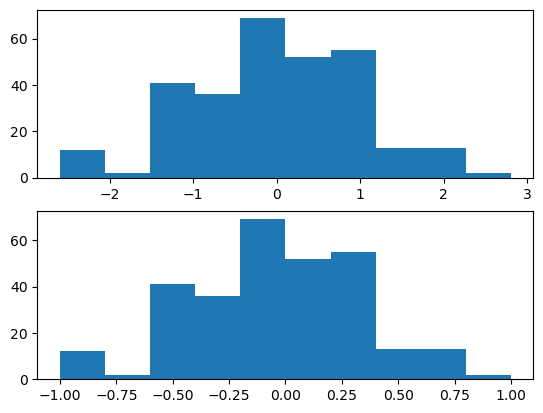

In [276]:
i = i+1
print(i)
fig, axes = plt.subplots(2)
axes[0].hist(acs_yj[c4[i]])
axes[1].hist(acs_yjz[c4[i]])

### One hot encoding

#### For presence of accidents

In [248]:
acp_cat = acpr[c5].copy()

In [249]:
acp_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr           1087 non-null   int64  
 1   z_qnr        1087 non-null   int64  
 2   z_knr        1087 non-null   int64  
 3   trafficarea  1087 non-null   object 
 4   r_width      1087 non-null   int64  
 5   speedlimit   1087 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 51.1+ KB


In [250]:
oh = ce.OneHotEncoder(cols = c2)
acp_catoh = oh.fit_transform(acp_cat)

In [251]:
acp_catoh.columns

Index(['Nr', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_qnr_34', 'z_knr_1', 'z_knr_2',
       'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8',
       'z_knr_9', 'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1',
       'trafficarea_2', 'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3',
       'r_width_4', 'r_width_5', 'r_width_6', 'r_width_7', 'speedlimit_1',
       'speedlimit_2', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5',
       'speedlimit_6', 'speedlimit_7'],
      dtype='object')

In [252]:
acp_catoh = acp_catoh.drop(columns = ['z_qnr_34', 'z_knr_12', 'trafficarea_3', 
                                      'r_width_7','speedlimit_7'])

In [253]:
# Merge numeric and categorical variables
df_acp_transformed = acp_yj1z.merge(acp_catoh, on = ['Nr'])

In [303]:
# Depedent variables
df_acpdv = acpr[['Nr','acp']].copy()

In [305]:
df_acp_transformed = df_acp_transformed.merge(df_acpdv, on = ['Nr'])

In [307]:
df_acp_transformed.to_csv('/home/yelhe/script/mtp/redo_model_input/model_acp_transformed_corr.csv', index = False)

#### For severity of accidents

In [293]:
acs_cat = acsr[c5].copy()
acs_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr           295 non-null    int64  
 1   z_qnr        295 non-null    int64  
 2   z_knr        295 non-null    int64  
 3   trafficarea  295 non-null    object 
 4   r_width      295 non-null    int64  
 5   speedlimit   295 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 14.0+ KB


In [294]:
oh = ce.OneHotEncoder(cols = c2)
acs_catoh = oh.fit_transform(acs_cat)

In [295]:
acs_catoh.columns

Index(['Nr', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5',
       'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11',
       'z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5',
       'r_width_6', 'r_width_7', 'speedlimit_1', 'speedlimit_2',
       'speedlimit_3', 'speedlimit_4', 'speedlimit_5', 'speedlimit_6'],
      dtype='object')

In [297]:
acs_catoh = acs_catoh.drop(columns = ['z_qnr_31', 'z_knr_12', 'trafficarea_3', 
                                      'r_width_7','speedlimit_6'])

In [298]:
# Merge numeric and categorical variables
df_acs_transformed = acs_yjz.merge(acs_catoh, on = ['Nr'])

In [309]:
# Depedent variables
df_acsdv = acsr[['Nr','SV', 'LV', 'pd', 'svp', 'lvp','pdp', 'inp']].copy()
df_acs_transformed = df_acs_transformed.merge(df_acsdv, on = ['Nr'])

In [310]:
df_acs_transformed.to_csv('/home/yelhe/script/mtp/redo_model_input/model_acs_transformed_corr.csv', index = False)